<a href="https://colab.research.google.com/github/sseydaltin/makine/blob/main/lojistik_regresyon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lojistik Regresyon: Üniversite Kabul Tahmini

Veri Seti Hikayesi ve Amacı
Veri Seti Adı: Admission Predict

Bu veri seti, üniversiteye kabul başvurularını analiz etmek için kullanılır ve bir öğrencinin üniversiteye kabul edilme olasılığı ile ilgili çeşitli faktörleri içerir. Veride yer alan özellikler, öğrencinin akademik başarıları, test puanları ve kişisel bilgileri gibi faktörlerden oluşur. Amaç, öğrencinin kabul edilip edilmeyeceğini tahmin etmek ve buna etki eden ana faktörleri anlamaktır.

### **1️⃣ Veri Setini Anlama ve Ön İşleme**  

In [3]:
import pandas as pd

# Veri setini yükleyin
df = pd.read_csv("/content/Admission_Predict.csv")
print(df.columns)


Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


**SÜTUNLARI TANIYALIM**

| Sütun Adı             | Açıklama                                                                                                      |
| --------------------- | ------------------------------------------------------------------------------------------------------------- |
| **Serial No.**        | Öğrenciye atanmış sıra numarası (modelleme için gereksizdir, genellikle çıkarılır).                           |
| **GRE Score**         | Öğrencinin GRE sınavından aldığı puan (0-340 arası).                                                          |
| **TOEFL Score**       | TOEFL sınavından alınan puan (0-120 arası).                                                                   |
| **University Rating** | Başvurulan üniversitenin sıralaması (1 ila 5 arasında).                                                       |
| **SOP**               | Statement of Purpose (niyet mektubu) puanı (1 ila 5 arasında öğrenci tarafından verilen).                     |
| **LOR**               | Letter of Recommendation (referans mektubu) puanı (1 ila 5 arasında).                                         |
| **CGPA**              | Lisans not ortalaması (10 üzerinden).                                                                         |
| **Research**          | Öğrencinin araştırma deneyimi olup olmadığı (1 = Evet, 0 = Hayır).                                            |
| **Chance of Admit**   | Üniversiteye kabul edilme ihtimali (0.0 ile 1.0 arasında sürekli bir değer). Bu, bağımlı (hedef) değişkendir. |


In [5]:
# İlk 5 satırı görüntüleyin
print(df.head())


   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


**Eksik Değer Kontrolü**

In [6]:
# Eksik değer sayısını göster
print(df.isnull().sum())


Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


**İkili Sınıflandırmaya Dönüştürme**

In [7]:
# Yeni bir sütun oluştur: Admitted
df['Admitted'] = (df['Chance of Admit '] >= 0.75).astype(int)

# Sonuçları kontrol et
print(df[['Chance of Admit ', 'Admitted']].head())


   Chance of Admit   Admitted
0              0.92         1
1              0.76         1
2              0.72         0
3              0.80         1
4              0.65         0


 **Bağımsız Değişkenler**

Kullanabileceğimiz sütunlar şunlardır:

GRE Score

TOEFL Score

University Rating

SOP

LOR

CGPA

Research

Serial No. anlamsız bir sıra numarasıdır, modele dahil edilmez.
Chance of Admit hedefin dönüşümünde kullanıldı, artık hedef sütun Admitted.

In [8]:
# Bağımsız değişkenler
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]

# Bağımlı değişken
y = df['Admitted']


### **2️⃣ Veriyi Eğitim ve Test Setlerine Bölme**  

**Eğitim/Test Verisine Ayırma**

In [9]:
from sklearn.model_selection import train_test_split

# Veriyi %80 eğitim, %20 test olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Boyutları kontrol et
print("Eğitim veri seti boyutu:", X_train.shape)
print("Test veri seti boyutu:", X_test.shape)


Eğitim veri seti boyutu: (320, 7)
Test veri seti boyutu: (80, 7)


**📝 Açıklamalar:**

test_size=0.2 → test verisi %20 olacak demektir.

random_state=42 → sonuçların tekrar üretilebilir olmasını sağlar (sabit rasgelelik).

X_train, y_train → eğitim verisi

X_test, y_test → test verisi

Artık lojistik regresyon aşamasına geçmeye hazırız.

**StandardScaler ile Veri Ölçeklendirme**

In [10]:
from sklearn.preprocessing import StandardScaler

# Ölçekleyici nesnesini oluştur
scaler = StandardScaler()

# Sadece X (bağımsız değişkenler) ölçeklenir
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**📝 Açıklamalar:**

*fit_transform:* Eğitim verisi üzerinde hem fit (istatistikleri öğrenir) hem transform (dönüştürür) işlemi yapılır.

*transform:* Test verisine yalnızca eğitimden öğrenilen bilgiler uygulanır.

Bu işlem modelin aşırı öğrenmesini *(data leakage)* engeller.

### **3️⃣ Lojistik Regresyon Modelini Eğitme**

In [11]:
from sklearn.linear_model import LogisticRegression

# Model nesnesini oluştur
model = LogisticRegression()

# Modeli eğit (fit et)
model.fit(X_train_scaled, y_train)


LogisticRegression()

*LogisticRegression()* → Lojistik regresyon modeli oluşturur.

*.fit(X_train_scaled, y_train)* → Ölçeklenmiş eğitim verisi ile modeli eğitir.

**Test Verisi Üzerinde Tahmin**

In [12]:
# Test verisi ile tahmin yap
y_pred = model.predict(X_test_scaled)

# İlk birkaç tahmini görelim
print("Tahminler:", y_pred[:10])
print("Gerçek Değerler:", y_test.values[:10])


Tahminler: [0 1 1 1 0 1 0 0 0 1]
Gerçek Değerler: [0 0 1 1 0 1 0 0 0 1]


✅ Şimdi modelin doğruluk (accuracy) gibi metriklerle ne kadar iyi performans gösterdiğine bakalım.

### **4️⃣ Modeli Değerlendirme ve Analiz**  

**Doğruluk Oranı Hesaplama**

In [13]:
from sklearn.metrics import accuracy_score

# Modelin doğruluk oranını hesapla
accuracy = accuracy_score(y_test, y_pred)

# Doğruluk oranını yazdır
print(f"Modelin Doğruluk Oranı: {accuracy:.4f}")


Modelin Doğruluk Oranı: 0.9125


Yorum:
Modelin doğruluk oranı %91.25 oldukça yüksek, bu da modelinin test verisi üzerinde doğru tahminler yaptığı anlamına geliyor.

**Karmaşıklık Matrisi (Confusion Matrix) Oluşturma**

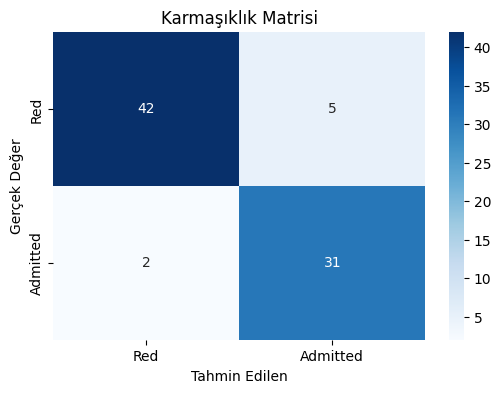

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Karmaşıklık matrisini oluştur
cm = confusion_matrix(y_test, y_pred)

# Görselleştirmek için ısı haritası kullan
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Red', 'Admitted'], yticklabels=['Red', 'Admitted'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.title('Karmaşıklık Matrisi')
plt.show()


Hatırlayalım:

True Positive (TP): Gerçek kabul edilen öğrenciler, doğru kabul edilenler.

True Negative (TN): Gerçek red edilen öğrenciler, doğru red edilenler.

False Positive (FP): Gerçek red edilen öğrenciler, yanlış kabul edilenler.

False Negative (FN): Gerçek kabul edilen öğrenciler, yanlış red edilenler.

**Precision, Recall ve F1-Score Hesaplama**

In [15]:
from sklearn.metrics import classification_report

# Precision, Recall ve F1-score değerlerini yazdır
report = classification_report(y_test, y_pred, target_names=['Red', 'Admitted'])
print(report)


              precision    recall  f1-score   support

         Red       0.95      0.89      0.92        47
    Admitted       0.86      0.94      0.90        33

    accuracy                           0.91        80
   macro avg       0.91      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80



In [16]:
# Test verisi için tahmin edilen kabul olasılıkları
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # 1. sütun 'Admitted' sınıfının olasılığı

# Gerçek değerler ile karşılaştırmak için ilk 10 tahminin olasılıklarını yazdır
for i in range(10):
    print(f"Gerçek Değer: {y_test.iloc[i]}, Tahmin Edilen Olasılık: {y_prob[i]:.4f}")


Gerçek Değer: 0, Tahmin Edilen Olasılık: 0.0820
Gerçek Değer: 0, Tahmin Edilen Olasılık: 0.5204
Gerçek Değer: 1, Tahmin Edilen Olasılık: 0.9971
Gerçek Değer: 1, Tahmin Edilen Olasılık: 0.9452
Gerçek Değer: 0, Tahmin Edilen Olasılık: 0.0134
Gerçek Değer: 1, Tahmin Edilen Olasılık: 0.9969
Gerçek Değer: 0, Tahmin Edilen Olasılık: 0.0024
Gerçek Değer: 0, Tahmin Edilen Olasılık: 0.0029
Gerçek Değer: 0, Tahmin Edilen Olasılık: 0.0566
Gerçek Değer: 1, Tahmin Edilen Olasılık: 0.9538


Yorum:

Kabul edilenler için yüksek olasılıklar (0.95 ve üstü).

Red edilenler için düşük olasılıklar (0.05 ve altı).

Bu durum, modelin genellikle doğru tahminler yaptığına işaret eder.

### **5️⃣ Modelin Öğrenme Sürecini Takip Etme**  

Hatırlatma

**Ağırlıklar (Weights):**

Modelin öğrenme sürecinde her bir özelliğe verilen önemi gösteren değerlerdir.

Model, özelliklerin değerleri ile ağırlıkları çarparak tahminler yapar.

**Iterasyonlar:**

Modelin öğrenme sürecinde ağırlıkları güncelleme adımlarıdır.

Her iterasyonda, model hatayı azaltmak için ağırlıkları biraz daha iyileştirir.

**Özet:**
Ağırlıklar: Özelliklerin model üzerindeki etkisi.

Iterasyonlar: Modelin öğrenme sürecindeki her adım.

**Modelin Ağırlıklarını ve Bias'ını Yazdırma**

In [17]:
# Modelin ağırlıkları (coefficients) ve bias'ı (intercept)
weights = model.coef_
bias = model.intercept_

# Ağırlıkları ve bias'ı yazdır
print("Ağırlıklar (W):", weights)
print("Bias (b):", bias)


Ağırlıklar (W): [[0.71823304 0.34698431 0.30993856 0.42555718 0.25271671 1.76046183
  0.41154067]]
Bias (b): [-0.37879045]


Yorum:

En yüksek ağırlık CGPA'da (1.7605) bulunuyor, bu da modelin öğrencinin akademik geçmişini (CGPA) çok önemli bir faktör olarak kabul ettiğini gösteriyor.

GRE ve TOEFL skorları da önemli, ancak CGPA kadar güçlü değil.

Bias değeri negatif olduğu için, modelin tahminleri genellikle sıfırdan biraz daha düşük olacak, bu da red edilme olasılıklarının daha yüksek olduğu anlamına gelir.

**Tol Parametresi ve Erken Durma**

In [18]:
from sklearn.linear_model import LogisticRegression

# Modeli oluşturma ve tol değeri belirleme
model = LogisticRegression(max_iter=1000, tol=1e-4)

# Modeli eğitim verisiyle eğitme
model.fit(X_train_scaled, y_train)

# Modelin tol değeri ve eğitim süresi hakkında bilgi
print("Modelin tol değeri:", model.tol)


Modelin tol değeri: 0.0001


*tol = 0.0001:* Kayıp fonksiyonundaki değişiklik 0.0001'den küçükse, eğitim durur. Model, daha fazla iyileştirme yapılmadığını fark eder.

### **6️⃣ Sonuçları Yorumlama ve Modeli Geliştirme**  

Modelin en önemli değişkenlerini belirlemek için, ağırlıkların (weights) büyüklüğüne bakabiliriz.

In [19]:
import pandas as pd
import numpy as np

# Modelin ağırlıklarını al
coefficients = model.coef_[0]

# Özellik isimleri
features = X_train.columns

# Ağırlıklar ve özellikleri birleştir
importance_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Ağırlıkları büyüklüğe göre sıralayın
importance_df['Absolute Coefficient'] = importance_df['Coefficient'].apply(np.abs)
importance_df = importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# En önemli özellikleri göster
print(importance_df[['Feature', 'Coefficient']])


             Feature  Coefficient
5               CGPA     1.760462
0          GRE Score     0.718233
3                SOP     0.425557
6           Research     0.411541
1        TOEFL Score     0.346984
2  University Rating     0.309939
4               LOR      0.252717


Yorum:

En önemli değişkenler: CGPA, GRE Score, SOP, ve Research gibi akademik ve başvuru sürecindeki önemli faktörler.

En az önemli değişkenler: LOR (Tavsiye Mektubu) ve University Rating gibi, ancak yine de etkisi olan özellikler.

**Eşik Değeri Değiştirme ve Modeli Değerlendirme**

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Modelin tahmin edilen olasılıkları (predicted probabilities)
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

# 0.7 ve 0.8 eşik değerleriyle tahminler yapalım
thresholds = [0.7, 0.8]
for threshold in thresholds:
    y_pred_new = (y_pred_prob >= threshold).astype(int)

    # Modelin doğruluğunu ve diğer metrikleri hesaplayalım
    accuracy = accuracy_score(y_test, y_pred_new)
    cm = confusion_matrix(y_test, y_pred_new)
    report = classification_report(y_test, y_pred_new)

    print(f"\nEşik Değeri: {threshold}")
    print(f"Doğruluk Oranı: {accuracy:.4f}")
    print("Karmaşıklık Matrisi:")
    print(cm)
    print("Sınıflandırma Raporu:")
    print(report)



Eşik Değeri: 0.7
Doğruluk Oranı: 0.9375
Karmaşıklık Matrisi:
[[45  2]
 [ 3 30]]
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        47
           1       0.94      0.91      0.92        33

    accuracy                           0.94        80
   macro avg       0.94      0.93      0.94        80
weighted avg       0.94      0.94      0.94        80


Eşik Değeri: 0.8
Doğruluk Oranı: 0.9500
Karmaşıklık Matrisi:
[[46  1]
 [ 3 30]]
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        47
           1       0.97      0.91      0.94        33

    accuracy                           0.95        80
   macro avg       0.95      0.94      0.95        80
weighted avg       0.95      0.95      0.95        80



Yorum:

**Eşik Değeri 0.7:**

 Model, 1 sınıfını kabul etmek için daha düşük bir güvenle hareket ediyor, bu da recall'ı artırıyor, ancak precision'ı biraz düşürüyor. Yani, daha fazla yanlış negatif (FN) tahmin yapılıyor. Doğruluk biraz daha düşük.

**Eşik Değeri 0.8:**

 Model daha yüksek bir güvenle 1 sınıfını kabul ediyor, bu da precision'ı artırıyor ve yanlış pozitif sayısını azaltıyor. Ancak, recall'da 0 sınıfı dışında düşüş yaşanıyor. Doğruluk daha yüksek, çünkü model daha güvenli tahminler yapıyor.

Sonuç olarak:

Eşik 0.8 ile daha az yanlış pozitif (FP) ve daha yüksek doğruluk oranı elde ediyorsunuz, ancak recall biraz düşüyor.

Eşik 0.7 ile model daha dikkatli olup bazı yanlış negatifleri telafi edebiliyor.

### Modelin Geliştirilmesi İçin Öneriler

1. **Daha Fazla Özellik Eklemek**: Yeni veri noktaları veya özellik mühendisliğiyle (örneğin, GRE ve TOEFL puanlarının kombinasyonu) modelin bilgi yelpazesini genişletebiliriz.

2. **Farklı Modeller Denemek**: Lojistik regresyon dışında, **SVM**, **Random Forest**, veya **XGBoost** gibi modelleri deneyebiliriz. Bu modeller genellikle daha güçlü sonuçlar verebilir.

3. **Model Parametrelerini Optimize Etmek**: **GridSearchCV** veya **RandomizedSearchCV** kullanarak hiperparametre optimizasyonu yapabiliriz. **Regularization** (L1/L2) ile overfitting’i önleyebiliriz.

4. **Dengesiz Veri Seti Durumu**: **SMOTE** ile veri dengesizliğini giderebilir veya **class\_weight** ile modelin azınlık sınıfına ağırlık vermesini sağlayabiliriz.

5. **Veri Temizliği ve Zenginleştirme**: Aykırı değerleri temizleyip ve eksik verileri daha sofistike yöntemlerle doldurabiliriz. Verimizi çeşitlendirmek için simülasyonlar veya benzer öğrenci verisi oluşturabiliriz.

6. **Veri Ölçeklendirme ve Aykırı Değerler**: Veriyi **standartlaştırın**, aykırı değerleri temizleyerek modelin daha iyi genelleme yapmasını sağlayabiliriz.

7. **Performans Metrikleri**: **ROC AUC** veya **cross-validation** ile modelin doğruluğunu daha güvenilir şekilde ölçebiliriz.


